# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import datetime


# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-10, 100)
lng_range = (-18, 280)


## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-11.000, high=110.000, size=1550)
lngs = np.random.uniform(low=-19.000, high=270.000, size=1550)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

545

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# Establish base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

# Create dataframe to be added to in for loop
weatherDF = pd.DataFrame()
weatherDF["City"] = ""
weatherDF["Cloudiness"] = ""
weatherDF["Country"] = ""
weatherDF["Date"] = "" 
weatherDF["Humidity"] = ""
weatherDF["Lat"] = ""
weatherDF["Lng"] = ""
weatherDF["Max Temp"] = ""
weatherDF["Wind Speed"] = ""


# Print out the beginning of the retrieval notificaiton
print("Beginning Data Retrieval")
print("-------------------------------")

# Loop through all of the cities within the cities array
for x in np.arange(len(cities)):

    # Print processing of the current record along with city
    print(f"Processing record {x} | {cities[x]}")
    
    # Try these things
    try:
        # Request the current wheather statistics from built URL of the current city in JSON form
        currentWeather = requests.get(f"{base_url}{api_keys}&q={cities[x]}&units=imperial").json()
        
        # Place all of the variables into the created dataframe
        weatherDF.loc[x, "City"] = currentWeather["name"]
        weatherDF.loc[x, "Cloudiness"] = currentWeather["clouds"]["all"]            
        weatherDF.loc[x, "Country"] = currentWeather["sys"]["country"]
        weatherDF.loc[x, "Date"] = currentWeather["dt"]
        weatherDF.loc[x, "Humidity"] = currentWeather["main"]["humidity"]
        weatherDF.loc[x, "Lat"] = currentWeather["coord"]["lat"]
        weatherDF.loc[x, "Lng"] = currentWeather["coord"]["lon"]
        weatherDF.loc[x, "Max Temp"] = currentWeather["main"]["temp_max"]
        weatherDF.loc[x, "Wind Speed"] = currentWeather["wind"]["speed"]
    
    # If previous block did not work display error message
    except (KeyError, IndexError):
        print("City not found. Skipping...")

# Print end of data retrieval process message
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

# Drop the rows that have been added with no data or partial data
clean_Weather = weatherDF.dropna()

Beginning Data Retrieval
-------------------------------
Processing record 0 | butaritari
City not found. Skipping...
Processing record 1 | berlevag
City not found. Skipping...
Processing record 2 | beringovskiy
City not found. Skipping...
Processing record 3 | muhos
City not found. Skipping...
Processing record 4 | leningradskiy
City not found. Skipping...
Processing record 5 | komsomolskiy
City not found. Skipping...
Processing record 6 | nzerekore
City not found. Skipping...
Processing record 7 | chernyshevskiy
City not found. Skipping...
Processing record 8 | saskylakh
City not found. Skipping...
Processing record 9 | grimari
City not found. Skipping...
Processing record 10 | kavieng
City not found. Skipping...
Processing record 11 | victoria
City not found. Skipping...
Processing record 12 | malindi
City not found. Skipping...
Processing record 13 | ayan
City not found. Skipping...
Processing record 14 | adeje
City not found. Skipping...
Processing record 15 | asau
City not found.

City not found. Skipping...
Processing record 138 | katsiveli
City not found. Skipping...
Processing record 139 | buarcos
City not found. Skipping...
Processing record 140 | ahmadnagar
City not found. Skipping...
Processing record 141 | yanchukan
City not found. Skipping...
Processing record 142 | aykhal
City not found. Skipping...
Processing record 143 | praya
City not found. Skipping...
Processing record 144 | sazonovo
City not found. Skipping...
Processing record 145 | davila
City not found. Skipping...
Processing record 146 | honningsvag
City not found. Skipping...
Processing record 147 | ossora
City not found. Skipping...
Processing record 148 | babanusah
City not found. Skipping...
Processing record 149 | lekoni
City not found. Skipping...
Processing record 150 | bubaque
City not found. Skipping...
Processing record 151 | airai
City not found. Skipping...
Processing record 152 | tessalit
City not found. Skipping...
Processing record 153 | agirish
City not found. Skipping...
Proce

City not found. Skipping...
Processing record 275 | guilin
City not found. Skipping...
Processing record 276 | tuy hoa
City not found. Skipping...
Processing record 277 | diffa
City not found. Skipping...
Processing record 278 | kloulklubed
City not found. Skipping...
Processing record 279 | harer
City not found. Skipping...
Processing record 280 | dauriya
City not found. Skipping...
Processing record 281 | harper
City not found. Skipping...
Processing record 282 | tungkang
City not found. Skipping...
Processing record 283 | dongsheng
City not found. Skipping...
Processing record 284 | torbat-e jam
City not found. Skipping...
Processing record 285 | dzhusaly
City not found. Skipping...
Processing record 286 | safwah
City not found. Skipping...
Processing record 287 | lere
City not found. Skipping...
Processing record 288 | lata
City not found. Skipping...
Processing record 289 | barca
City not found. Skipping...
Processing record 290 | thanh hoa
City not found. Skipping...
Processing r

City not found. Skipping...
Processing record 412 | akyab
City not found. Skipping...
Processing record 413 | am timan
City not found. Skipping...
Processing record 414 | muros
City not found. Skipping...
Processing record 415 | beyla
City not found. Skipping...
Processing record 416 | amga
City not found. Skipping...
Processing record 417 | qostanay
City not found. Skipping...
Processing record 418 | taki
City not found. Skipping...
Processing record 419 | ceyhan
City not found. Skipping...
Processing record 420 | skjervoy
City not found. Skipping...
Processing record 421 | warqla
City not found. Skipping...
Processing record 422 | bangkalan
City not found. Skipping...
Processing record 423 | mafinga
City not found. Skipping...
Processing record 424 | chhabra
City not found. Skipping...
Processing record 425 | kaniama
City not found. Skipping...
Processing record 426 | gornopravdinsk
City not found. Skipping...
Processing record 427 | canakkale
City not found. Skipping...
Processing r

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
weatherDF.count()

City          0
Cloudiness    0
Country       0
Date          0
Humidity      0
Lat           0
Lng           0
Max Temp      0
Wind Speed    0
dtype: int64

In [23]:
# Output to data file previously defined
clean_Weather.to_csv('output.csv')
# Display the final dataframe
clean_Weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

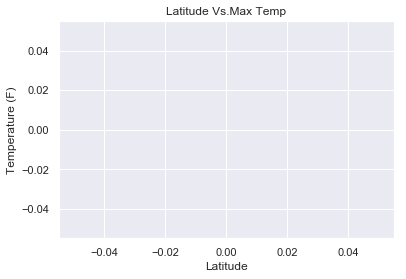

In [24]:
# Plot a scatter plot of latitude vs temperature with formatting
plt.scatter(clean_Weather["Lat"],clean_Weather["Max Temp"],marker ="o")
plt.title("Latitude Vs.Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()

# Save the figure to the output folder

#### Humidity Vs. Latitude Scatter Plot

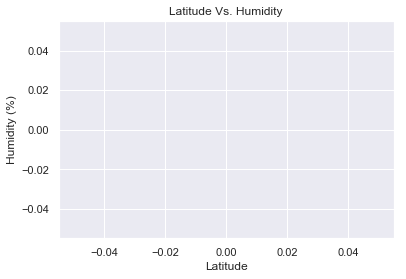

In [25]:
#Humidity Vs. Latitude Scatter Plot
plt.scatter(clean_Weather["Lat"],clean_Weather["Humidity"],marker ="o")
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

#### Latitude vs. Cloudiness Plot

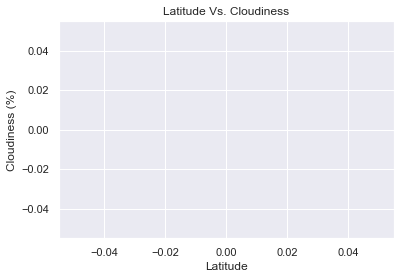

In [26]:
#Latitude Scatter Vs Cloudiness Plot
plt.scatter(clean_Weather["Lat"],clean_Weather["Cloudiness"],marker ="o")
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

#### Latitude vs. Wind Speed Plot

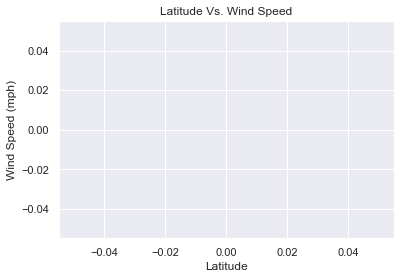

In [27]:
#Latitude Vs Wind Speed Scatter Plot
plt.scatter(clean_Weather["Lat"],clean_Weather["Wind Speed"],marker ="o")
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()